In [ ]:
import pandas as pd
import random

# Load the dataset
df = pd.read_csv("Ads_CTR_Optimisation.csv")

def epsilon_greedy(df, epsilon=0.1, n_rounds=10000):
    n_ads = df.shape[1]
    n_selections = [0] * n_ads
    total_rewards = [0] * n_ads
    ad_selected = []

    for i in range(n_rounds):
        if random.random() < epsilon:
            ad = random.randrange(n_ads)  # Explore
        else:
            avg_rewards = [total_rewards[j] / n_selections[j] if n_selections[j] > 0 else 0 for j in range(n_ads)]
            ad = avg_rewards.index(max(avg_rewards))  # Exploit

        ad_selected.append(ad)
        reward = df.values[i, ad]
        n_selections[ad] += 1
        total_rewards[ad] += reward

    best_ad = total_rewards.index(max(total_rewards))
    results_df = pd.DataFrame({
        'Ad Index': list(range(n_ads)),
        'Number of Selections': n_selections,
        'Total Reward': total_rewards
    }).sort_values(by='Total Reward', ascending=False)

    print(f"Best performing ad is Ad {best_ad}")
    print(results_df)
    return results_df # Return the results_df

results_df = epsilon_greedy(df, epsilon=0.1, n_rounds=len(df)) # Assign the returned dataframe to results_df

Best performing ad is Ad 4
   Ad Index  Number of Selections  Total Reward
4         4                  8456          2295
0         0                   584           100
8         8                   214            27
6         6                   130            17
1         1                    99            16
7         7                    99            16
3         3                   100            15
2         2                    98             9
9         9                   123             5
5         5                    97             4


Dataset loaded successfully.
   Ad 0  Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9
0     1     0     0     0     1     0     0     0     1     0
1     0     0     0     0     0     0     0     0     1     0
2     0     0     0     0     0     0     0     0     0     0
3     0     1     0     0     0     0     0     1     0     0
4     0     0     0     0     0     0     0     0     0     0
Number of ads: 10
Number of users: 10000
Epsilon value: 0.1
Epsilon-greedy simulation completed.
Total reward obtained: 2555
Ad selection counts: [278, 106, 102, 95, 8902, 101, 95, 106, 114, 101]
Sum of rewards for each ad: [np.int64(42), np.int64(15), np.int64(13), np.int64(10), np.int64(2424), np.int64(1), np.int64(11), np.int64(23), np.int64(12), np.int64(4)]
The ad selected most often was Ad 8902 with 4 selections.
The ad with the highest total reward is Ad 4 with a total reward of 2424.
Average reward for each ad: [np.float64(0.1510791366906475), np.float64(0.14150943396226415), np.float

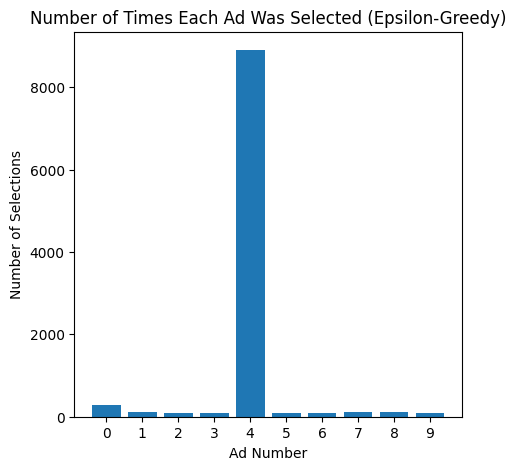

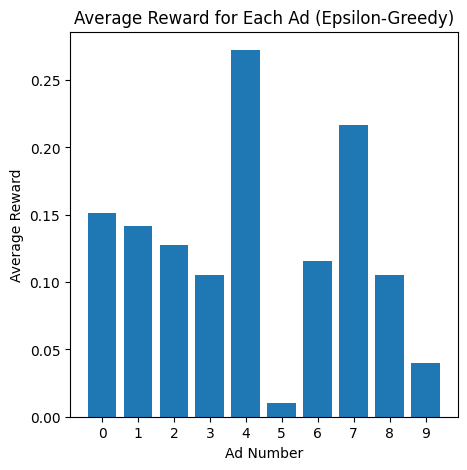

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Ads_CTR_Optimisation.csv')
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("Error: Ads_CTR_Optimisation.CSV not found. Please make sure the file is in the correct directory.")
    df = None


import random

# Define epsilon
epsilon = 0.1 # You can change this value

num_ads = df.shape[1]
num_users = df.shape[0]

ads_selected = [0] * num_ads
rewards_sum = [0] * num_ads

print(f"Number of ads: {num_ads}")
print(f"Number of users: {num_users}")
print(f"Epsilon value: {epsilon}")



import random

selected_ads = []
total_reward = 0

for user in range(num_users):
    ad_to_select = -1
    if random.random() < epsilon:
        ad_to_select = random.randrange(num_ads)
    else:
        max_reward = -1
        for ad in range(num_ads):
            if ads_selected[ad] > 0:
                average_reward = rewards_sum[ad] / ads_selected[ad]
            else:
                average_reward = 0

            if average_reward > max_reward:
                max_reward = average_reward
                ad_to_select = ad
        if ad_to_select == -1:
             ad_to_select = random.randrange(num_ads)

    ads_selected[ad_to_select] += 1
    reward = df.values[user, ad_to_select]
    rewards_sum[ad_to_select] += reward
    total_reward += reward

    selected_ads.append(ad_to_select)

print("Epsilon-greedy simulation completed.")
print(f"Total reward obtained: {total_reward}")



most_selected_ad = selected_ads.count(max(selected_ads, key=selected_ads.count))
best_ad_index = rewards_sum.index(max(rewards_sum))

print(f"Ad selection counts: {ads_selected}")
print(f"Sum of rewards for each ad: {rewards_sum}")
print(f"The ad selected most often was Ad {selected_ads.count(max(selected_ads, key=selected_ads.count))} with {max(selected_ads, key=selected_ads.count)} selections.")
print(f"The ad with the highest total reward is Ad {best_ad_index} with a total reward of {rewards_sum[best_ad_index]}.")

average_rewards = [rewards_sum[i] / ads_selected[i] if ads_selected[i] > 0 else 0 for i in range(num_ads)]
print(f"Average reward for each ad: {average_rewards}")

best_ad_average_reward = average_rewards.index(max(average_rewards))
print(f"The ad with the highest average reward is Ad {best_ad_average_reward} with an average reward of {average_rewards[best_ad_average_reward]:.4f}.")


import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.bar(range(num_ads), ads_selected)
plt.title('Number of Times Each Ad Was Selected (Epsilon-Greedy)')
plt.xlabel('Ad Number')
plt.ylabel('Number of Selections')
plt.xticks(range(num_ads))
plt.show()

plt.figure(figsize=(5, 5))
plt.bar(range(num_ads), average_rewards)
plt.title('Average Reward for Each Ad (Epsilon-Greedy)')
plt.xlabel('Ad Number')
plt.ylabel('Average Reward')
plt.xticks(range(num_ads))
plt.show()